DESCRIPCIÓN DE VARIABLES
**INSTITUCION:** corresponde a la institución educativa donde está matriculado el estudiante.
SEDE: sede de la institución educativa a la cual pertenece el estudiante.
**ZONA_SEDE:** modalidad (rural o urbana) donde está ubicada la sede de la institución.
**JORNADA:** horario en el que se presta el servicio escolar (mañana, tarde, única, nocturna y fin de semana).
**GRADO_COD:** grado que cursa el estudiante:
-2 corresponde a Prejardín
-1 Jardín
0 Transición
1 Primero
2 Segundo
3 Tercero
4 Cuarto
5 Quinto
6 Sexto
7 Séptimo
8 Octavo
9 Noveno
10 Décimo
11 Undécimo
44: Programa complememtario ciclo 3
99: Aceleración del aprendizaje
**ESTRATO:** Estrato socioeconómico de los estudiantes.
**SISBEN IV:** Clasificación de los estudiantes al sistema de Identificación de Potenciales Beneficiarios de Programas Sociales.
**GÉNERO:** Femenino o masculino.
**FECHA_NACIMIENTO:** Año, mes y día del nacimiento del estudiante.
**BARRIO:** Barrio donde residen los estudiantes.
**DISCAPACIDAD:** Corresponde a alguna condición que presente el estudiante.
**PAÍS_ORIGEN:** País de origen del estudiante.







In [1]:
# vincular colab con Google Drive
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


#Librerias

In [14]:
# @title Instalar libreria
%pip install sweetviz
%pip install category_encoders
%pip install rdt


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.5/68.5 kB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 24.9 MB/s eta 0:00:00


In [3]:
# importar librerias y modulos a utilizar
import os
import re
import math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import sweetviz as sw
import category_encoders as ce
from google.colab import files

#ML

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score, f1_score, classification_report, roc_auc_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.decomposition import PCA
import xgboost as xgb


#Balanceo
from imblearn.under_sampling import CondensedNearestNeighbour, EditedNearestNeighbours, InstanceHardnessThreshold, RepeatedEditedNearestNeighbours, OneSidedSelection
from imblearn.under_sampling import TomekLinks
from collections import Counter
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
from sklearn.cluster import MiniBatchKMeans
from imblearn.under_sampling import ClusterCentroids
from imblearn.under_sampling import NearMiss

#Algoritmos
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_text
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import make_scorer
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

# Funciones

In [4]:
# @title Cargamos las funciones relacionadas
# Función para analizar la base de datos que devuelve cantidad de registros, valores únicos, total de vacíos, porcentaje de valores faltantes
def analizar_columnas(df):
  """
  Analiza las columnas de un DataFrame y devuelve información estadística.

  Parámetros:
  df (DataFrame): El DataFrame a analizar.

  Retorno:
  Un DataFrame con la información estadística de cada columna.

  Ejemplo:
  df_analizado = analizar_columnas(df)
  print(df_analizado)
  """
  info = []
  for columna in df.columns:
    unicos = df[columna].nunique()
    nulos = df[columna].isnull().sum()
    total = len(df)
    porcentaje_nulos = (nulos / total) * 100
    info.append({
      'Columna': columna,
      'Cantidad de registros': total,
      'Únicos': unicos,
      'Cantidad de nulos': nulos,
      'Porcentaje de nulos': porcentaje_nulos,
      'Registros relacionados con nulos': total - nulos
    })
  return pd.DataFrame(info)

# Ruta de datos

In [5]:
# ruta de la carpeta donde están guardadas las bases de datos
path="/content/drive/MyDrive/PROYECTO INTELIGENCIA ARTIFICIAL/DATOS/"

# Base de datos

In [6]:
# cargamos cada una de las bases de datos
bbdd = pd.read_excel(path+"MATRICULA 2025.xlsx")


# Limpieza de datos

In [ ]:
bbdd.head(3)

,ANO,ETC,INSTITUCION,SECTOR,SEDE,ZONA_SEDE,JORNADA,GRADO_COD,ESTRATO,SISBEN IV,GENERO,FECHA_NACIMIENTO,BARRIO,DISCAPACIDAD,PAIS_ORIGEN
0,2025,MANIZALES,INSTITUCIÓN EDUCATIVA SIETE DE AGOSTO,OFICIAL,INSTITUCIÓN EDUCATIVA SIETE DE AGOSTO,URBANA,MAÑANA,8,ESTRATO 1,NO APLICA,MASCULINO,2011-02-01,CARMEN,NO APLICA,COLOMBIA
1,2025,MANIZALES,INSTITUCIÓN EDUCATIVA SIETE DE AGOSTO,OFICIAL,INSTITUCIÓN EDUCATIVA SIETE DE AGOSTO,URBANA,MAÑANA,4,ESTRATO 1,A1,MASCULINO,2014-05-05,EL CARMEN,NO APLICA,COLOMBIA
2,2025,MANIZALES,INSTITUCIÓN EDUCATIVA COLEGIO SAN JORGE,OFICIAL,INSTITUCIÓN EDUCATIVA COLEGIO SAN JORGE,URBANA,TARDE,2,ESTRATO 3,A3,MASCULINO,2017-11-10,SAN JORGE,NO APLICA,COLOMBIA


In [ ]:
# muestra los datos únicos dentro de una variable
bbdd.ANO.unique()

array([2025])

In [7]:
# después de analizar cuales columnas no nos interesan, las eliminamos
bbdd.drop(columns=['ANO', 'ETC', 'SECTOR'], inplace=True)
bbdd.drop(columns=['BARRIO'], inplace=True)



In [ ]:
bbdd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35814 entries, 0 to 35813
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   INSTITUCION       35814 non-null  object        
 1   SEDE              35814 non-null  object        
 2   ZONA_SEDE         35814 non-null  object        
 3   JORNADA           35814 non-null  object        
 4   GRADO_COD         35814 non-null  int64         
 5   ESTRATO           35814 non-null  object        
 6   SISBEN IV         35814 non-null  object        
 7   GENERO            35814 non-null  object        
 8   FECHA_NACIMIENTO  35814 non-null  datetime64[ns]
 9   BARRIO            35814 non-null  object        
 10  DISCAPACIDAD      35814 non-null  object        
 11  PAIS_ORIGEN       35814 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(10)
memory usage: 3.3+ MB


In [ ]:
bbdd.DISCAPACIDAD.unique()

array(['NO APLICA', 'DISCAPACIDAD INTELECTUAL',
       'DISCAPACIDAD PSICOSOCIAL (MENTAL)',
       'DISCAPACIDAD VISUAL BAJA VISIÓN IRREVERSIBLE',
       'TRASTORNO DEL ESPECTRO AUTISTA',
       'DISCAPACIDAD AUDITIVA USUARIO DEL CASTELLANO',
       'DISCAPACIDAD FÍSICA', 'DISCAPACIDAD MÚLTIPLE',
       'TRANSTORNO PERMANENTE DE VOZ Y HABLA',
       'DISCAPACIDAD AUDITIVA - USUARIO DE LENGUA DE SEÑAS COLOMBIANA',
       'DISCAPACIDAD VISUAL CEGUERA'], dtype=object)

In [ ]:
# @title Verificar la forma de los datos
print(f"Forma de los datos (filas, columnas): {bbdd.shape}")

Forma de los datos (filas, columnas): (35814, 12)


In [ ]:
# @title Verificar los tipos de datos de cada columna
print("\nTipos de datos por columna:")
print(bbdd.dtypes)


Tipos de datos por columna:
INSTITUCION                 object
SEDE                        object
ZONA_SEDE                   object
JORNADA                     object
GRADO_COD                    int64
ESTRATO                     object
SISBEN IV                   object
GENERO                      object
FECHA_NACIMIENTO    datetime64[ns]
BARRIO                      object
DISCAPACIDAD                object
PAIS_ORIGEN                 object
dtype: object


In [ ]:
#@title Contar los valores únicos por columna
print("\nValores únicos por columna:")
print(bbdd.nunique())


Valores únicos por columna:
INSTITUCION           50
SEDE                 106
ZONA_SEDE              2
JORNADA                5
GRADO_COD             26
ESTRATO                8
SISBEN IV             49
GENERO                 2
FECHA_NACIMIENTO    6029
BARRIO              2085
DISCAPACIDAD          11
PAIS_ORIGEN           25
dtype: int64


In [ ]:
#@title Verificar si hay datos faltantes
print("\nDatos faltantes por columna:")
print(bbdd.isnull().sum())


Datos faltantes por columna:
INSTITUCION         0
SEDE                0
ZONA_SEDE           0
JORNADA             0
GRADO_COD           0
ESTRATO             0
SISBEN IV           0
GENERO              0
FECHA_NACIMIENTO    0
BARRIO              0
DISCAPACIDAD        0
PAIS_ORIGEN         0
dtype: int64


In [ ]:
# @title Verificación de los campos con relación a la composición de la base de dato almacenada en formato CSV
df_analizado = analizar_columnas(bbdd)
df_analizado

,Columna,Cantidad de registros,Únicos,Cantidad de nulos,Porcentaje de nulos,Registros relacionados con nulos
0,INSTITUCION,35814,50,0,0.0,35814
1,SEDE,35814,106,0,0.0,35814
2,ZONA_SEDE,35814,2,0,0.0,35814
3,JORNADA,35814,5,0,0.0,35814
4,GRADO_COD,35814,26,0,0.0,35814
5,ESTRATO,35814,8,0,0.0,35814
6,SISBEN IV,35814,49,0,0.0,35814
7,GENERO,35814,2,0,0.0,35814
8,FECHA_NACIMIENTO,35814,6029,0,0.0,35814
9,BARRIO,35814,2085,0,0.0,35814


In [ ]:
# @title Realizamos la descriptiva estadística
bbdd.describe()

,GRADO_COD,FECHA_NACIMIENTO
count,35814.000000,35814
mean,6.744402,2013-04-20 20:02:51.284972288
min,-2.000000,1947-06-01 00:00:00
25%,3.000000,2010-04-10 00:00:00
50%,6.000000,2013-05-16 00:00:00
75%,9.000000,2016-09-03 00:00:00
max,99.000000,2022-01-28 00:00:00
std,7.854327,NaN


In [8]:
bbdd2 = bbdd.copy()

In [9]:
def clasificar_discapacidad(df, columna_origen, nueva_columna):
    """
    Clasifica las categorías de la columna de discapacidad en SIN DISCAPACIDAD (0) y DISCAPACIDAD (1).

    Parámetros:
        df (pd.DataFrame): DataFrame que contiene los datos.
        columna_origen (str): Nombre de la columna con etiquetas categóricas.
        nueva_columna (str): Nombre de la nueva columna con clasificación binaria.

    Retorna:
        pd.DataFrame: DataFrame con la nueva columna agregada.
    """
    # Asignar 0 a 'NO APLICA' y 1 a las demás categorías
    df[nueva_columna] = df[columna_origen].apply(lambda x: 0 if x == 'NO APLICA' else 1)
    return df


In [10]:
df = clasificar_discapacidad(bbdd2, 'DISCAPACIDAD', 'DISCAPACIDAD_BINARIA')

In [ ]:
df.DISCAPACIDAD.value_counts()

,count
DISCAPACIDAD,
NO APLICA,34384
DISCAPACIDAD INTELECTUAL,753
DISCAPACIDAD PSICOSOCIAL (MENTAL),321
DISCAPACIDAD MÚLTIPLE,134
TRASTORNO DEL ESPECTRO AUTISTA,93
DISCAPACIDAD FÍSICA,53
DISCAPACIDAD AUDITIVA USUARIO DEL CASTELLANO,38
DISCAPACIDAD VISUAL BAJA VISIÓN IRREVERSIBLE,18
DISCAPACIDAD AUDITIVA - USUARIO DE LENGUA DE SEÑAS COLOMBIANA,15


In [ ]:
df.DISCAPACIDAD_BINARIA.value_counts()

,count
DISCAPACIDAD_BINARIA,
0,34384
1,1430


In [11]:
from datetime import datetime

def calcular_edad(df):
    """
    Calcula la edad a partir de la columna FECHA_NACIMIENTO en un DataFrame y
    agrega una nueva columna EDAD con los valores calculados.

    Parámetros:
        df (pd.DataFrame): DataFrame que contiene la columna FECHA_NACIMIENTO.

    Retorna:
        pd.DataFrame: DataFrame con una nueva columna EDAD.
    """
    # Verificar que la columna FECHA_NACIMIENTO exista en el DataFrame
    if 'FECHA_NACIMIENTO' not in df.columns:
        raise ValueError("El DataFrame no contiene la columna 'FECHA_NACIMIENTO'.")

    # Convertir la columna FECHA_NACIMIENTO a tipo datetime
    df['FECHA_NACIMIENTO'] = pd.to_datetime(df['FECHA_NACIMIENTO'], errors='coerce')

    # Calcular la edad en años
    hoy = datetime.today()
    df['EDAD'] = df['FECHA_NACIMIENTO'].apply(
        lambda fecha: hoy.year - fecha.year - ((hoy.month, hoy.day) < (fecha.month, fecha.day))
        if pd.notnull(fecha) else None
    )

    return df

In [12]:
df = calcular_edad(df)
df2 = df[df.EDAD <= 18]


# EDA

In [13]:
# @title Análisis exploratorio de datos (EDA)
#Configurar las opciones de visualizacion Sweetviz
sw.config_parser.read_string("""
                              [Output_Defaults]
                              html_layout = widescreen
                              html_scale = 1.0
                              notebook_layout = widescreen
                              notebook_scale = 0.9
                              notebook_width = 100%
                              notebook_height = 700
                              [Layout]
                              show_logo = 0
                              """)
nombre = 'Analisis_estudiantes'
advert_report = sw.analyze(df2) # Realizamos el análisis de la base de datos inicial

#@markdown Guardar y mostrar reporte formato HTML
advert_report.show_html('EDA_df.html')

#@markdown Descarga y abre el reporte en una nueva pestaña del navegador
almacenar_archivo = input('Alamcenar archivo Si o No: ').title()
if almacenar_archivo == 'Si':
  files.download('/content/EDA_df.html')

                                             |          | [  0%]   00:00 -> (? left)

Report EDA_df.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.
Alamcenar archivo Si o No: si


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [15]:
df2 # base de datos organizada y completa

,INSTITUCION,SEDE,ZONA_SEDE,JORNADA,GRADO_COD,ESTRATO,SISBEN IV,GENERO,FECHA_NACIMIENTO,DISCAPACIDAD,PAIS_ORIGEN,DISCAPACIDAD_BINARIA,EDAD
0,INSTITUCIÓN EDUCATIVA SIETE DE AGOSTO,INSTITUCIÓN EDUCATIVA SIETE DE AGOSTO,URBANA,MAÑANA,8,ESTRATO 1,NO APLICA,MASCULINO,2011-02-01,NO APLICA,COLOMBIA,0,14
1,INSTITUCIÓN EDUCATIVA SIETE DE AGOSTO,INSTITUCIÓN EDUCATIVA SIETE DE AGOSTO,URBANA,MAÑANA,4,ESTRATO 1,A1,MASCULINO,2014-05-05,NO APLICA,COLOMBIA,0,10
2,INSTITUCIÓN EDUCATIVA COLEGIO SAN JORGE,INSTITUCIÓN EDUCATIVA COLEGIO SAN JORGE,URBANA,TARDE,2,ESTRATO 3,A3,MASCULINO,2017-11-10,NO APLICA,COLOMBIA,0,7
3,INSTITUCIÓN EDUCATIVA INEM BALDOMERO SANIN CANO,INSTITUCIÓN EDUCATIVA INEM BALDOMERO SANIN CANO,URBANA,ÚNICA,7,ESTRATO 1,A3,FEMENINO,2010-02-18,NO APLICA,COLOMBIA,0,15
4,INSTITUCIÓN EDUCATIVA SIETE DE AGOSTO,INSTITUCIÓN EDUCATIVA SIETE DE AGOSTO,URBANA,MAÑANA,6,ESTRATO 2,NO APLICA,MASCULINO,2012-10-30,NO APLICA,COLOMBIA,0,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...
35809,INSTITUCIÓN EDUCATIVA ATANASIO GIRARDOT,INSTITUCIÓN EDUCATIVA ATANASIO GIRARDOT,URBANA,ÚNICA,3,ESTRATO 2,C5,FEMENINO,2016-08-31,NO APLICA,COLOMBIA,0,8
35810,INSTITUCIÓN EDUCATIVA COLEGIO SAN JORGE,INSTITUCIÓN EDUCATIVA COLEGIO SAN JORGE,URBANA,TARDE,3,ESTRATO 4,B2,FEMENINO,2017-04-29,NO APLICA,COLOMBIA,0,7
35811,INSTITUCIÓN EDUCATIVA RURAL JOSE ANTONIO GALAN,INSTITUCIÓN EDUCATIVA RURAL JOSE ANTONIO GALAN,RURAL,ÚNICA,5,ESTRATO 2,NO APLICA,FEMENINO,2014-03-20,NO APLICA,COLOMBIA,0,10
35812,INSTITUCIÓN EDUCATIVA SAN PIO X,INSTITUCIÓN EDUCATIVA SAN PIO X,URBANA,MAÑANA,8,ESTRATO 3,NO APLICA,FEMENINO,2011-08-26,NO APLICA,COLOMBIA,0,13


In [16]:
df2.drop(columns=['DISCAPACIDAD', 'INSTITUCION', 'FECHA_NACIMIENTO'], inplace=True)

<ipython-input-16-79f85ee99864>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.drop(columns=['DISCAPACIDAD', 'INSTITUCION', 'FECHA_NACIMIENTO'], inplace=True)


In [ ]:
%pip install rdt

# Modelo

In [ ]:
import pandas as pd
import seaborn as sns
from rdt import HyperTransformer
from sklearn.model_selection import train_test_split

# 3️⃣ Eliminar filas con valores nulos
df2 = df2.dropna()

# 4️⃣ Separar variable objetivo
target_column = "DISCAPACIDAD_BINARIA"
X = df2.drop(columns=[target_column])
y = df2[target_column]

# 5️⃣ Crear el transformador RDT 🚀
ht = HyperTransformer()

# 6️⃣ Detectar configuración automáticamente ✅
ht.detect_initial_config(X)

# 7️⃣ Ajustar y transformar los datos 🔄
ht.fit(X)
X_transformed = ht.transform(X)

# 8️⃣ Convertir a DataFrame para visualizar 🔍
X_transformed = pd.DataFrame(X_transformed, columns=X.columns)

# 9️⃣ Mostrar comparación antes y después de la transformación
print("🔹 Datos originales:")
print(X.head())

print("\n🔹 Datos transformados:")
print(X_transformed.head())

# 🔟 Separar en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, test_size=0.3, random_state=42)

🔹 Datos originales:
                                              SEDE ZONA_SEDE JORNADA  \
0            INSTITUCIÓN EDUCATIVA SIETE DE AGOSTO    URBANA  MAÑANA   
1            INSTITUCIÓN EDUCATIVA SIETE DE AGOSTO    URBANA  MAÑANA   
2          INSTITUCIÓN EDUCATIVA COLEGIO SAN JORGE    URBANA   TARDE   
3  INSTITUCIÓN EDUCATIVA INEM BALDOMERO SANIN CANO    URBANA   ÚNICA   
4            INSTITUCIÓN EDUCATIVA SIETE DE AGOSTO    URBANA  MAÑANA   

   GRADO_COD    ESTRATO  SISBEN IV     GENERO PAIS_ORIGEN  EDAD  
0          8  ESTRATO 1  NO APLICA  MASCULINO    COLOMBIA    14  
1          4  ESTRATO 1         A1  MASCULINO    COLOMBIA    10  
2          2  ESTRATO 3         A3  MASCULINO    COLOMBIA     7  
3          7  ESTRATO 1         A3   FEMENINO    COLOMBIA    15  
4          6  ESTRATO 2  NO APLICA  MASCULINO    COLOMBIA    12  

🔹 Datos transformados:
       SEDE  ZONA_SEDE   JORNADA  GRADO_COD   ESTRATO  SISBEN IV    GENERO  \
0  0.009942   0.250078  0.241442        8.0  0.26

In [ ]:
import pandas as pd
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE

def balancear_datos_smote_undersample(X, y):
    """
    Balancea los datos utilizando SMOTE para aumentar la clase minoritaria y
    RandomUnderSampler para reducir la clase mayoritaria.

    Parámetros:
        X (pd.DataFrame): Características del conjunto de datos.
        y (pd.Series): Etiquetas del conjunto de datos.

    Retorna:
        tuple: DataFrame de características balanceadas y Series de etiquetas balanceadas.
    """
    # Verificar que X e y tengan el mismo número de filas
    if len(X) != len(y):
        raise ValueError("El número de filas en X y y debe ser igual.")

    # Reducir la clase mayoritaria con RandomUnderSampler
    undersampler = RandomUnderSampler(random_state=42)
    X_resampled, y_resampled = undersampler.fit_resample(X, y)

    # Aplicar SMOTE para aumentar la clase minoritaria
    smote = SMOTE(random_state=42)
    X_final, y_final = smote.fit_resample(X_resampled, y_resampled)

    return pd.DataFrame(X_final, columns=X.columns), pd.Series(y_final, name=y.name)

In [ ]:
import pandas as pd
from imblearn.under_sampling import RandomUnderSampler

def balancear_datos_undersample(X, y):
    """
    Balancea los datos únicamente reduciendo la clase mayoritaria mediante RandomUnderSampler.

    Parámetros:
        X (pd.DataFrame): Características del conjunto de datos.
        y (pd.Series): Etiquetas del conjunto de datos.

    Retorna:
        tuple: DataFrame de características balanceadas y Series de etiquetas balanceadas.
    """
    # Verificar que X e y tengan el mismo número de filas
    if len(X) != len(y):
        raise ValueError("El número de filas en X y y debe ser igual.")

    # Reducir la clase mayoritaria con RandomUnderSampler
    undersampler = RandomUnderSampler(random_state=42)
    X_resampled, y_resampled = undersampler.fit_resample(X, y)

    return pd.DataFrame(X_resampled, columns=X.columns), pd.Series(y_resampled, name=y.name)


In [ ]:
from imblearn.under_sampling import ClusterCentroids

def balancear_datos_cluster_centroids(X, y):
    """
    Balancea los datos reduciendo fuertemente la clase mayoritaria utilizando ClusterCentroids.

    Parámetros:
        X (pd.DataFrame): Características del conjunto de datos.
        y (pd.Series): Etiquetas del conjunto de datos.

    Retorna:
        tuple: DataFrame de características balanceadas y Series de etiquetas balanceadas.
    """
    # Verificar que X e y tengan el mismo número de filas
    if len(X) != len(y):
        raise ValueError("El número de filas en X y y debe ser igual.")

    # Reducir la clase mayoritaria con ClusterCentroids
    cluster_centroids = ClusterCentroids(random_state=42)
    X_resampled, y_resampled = cluster_centroids.fit_resample(X, y)

    return pd.DataFrame(X_resampled, columns=X.columns), pd.Series(y_resampled, name=y.name)

In [ ]:
from imblearn.under_sampling import ClusterCentroids
from imblearn.over_sampling import ADASYN

def balancear_datos_cluster_adasyn(X, y):
    """
    Balancea los datos reduciendo la clase mayoritaria con ClusterCentroids
    y aumentando la clase minoritaria con ADASYN.

    Parámetros:
        X (pd.DataFrame): Características del conjunto de datos.
        y (pd.Series): Etiquetas del conjunto de datos.

    Retorna:
        tuple: DataFrame de características balanceadas y Series de etiquetas balanceadas.
    """
    # Verificar que X e y tengan el mismo número de filas
    if len(X) != len(y):
        raise ValueError("El número de filas en X y y debe ser igual.")

    # Reducir la clase mayoritaria con ClusterCentroids
    cluster_centroids = ClusterCentroids(random_state=42)
    X_reduced, y_reduced = cluster_centroids.fit_resample(X, y)

    # Aumentar la clase minoritaria con ADASYN
    adasyn = ADASYN(random_state=42)
    X_resampled, y_resampled = adasyn.fit_resample(X_reduced, y_reduced)

    return pd.DataFrame(X_resampled, columns=X.columns), pd.Series(y_resampled, name=y.name)

In [ ]:
! pip install imblearn

In [ ]:
from imblearn.under_sampling import ClusterCentroids

def cluster_centroids(X, y):
    cc = ClusterCentroids(random_state=42)
    X_res, y_res = cc.fit_resample(X, y)
    return X_res, y_res

In [ ]:
from imblearn.over_sampling import ADASYN

def adasyn_oversampling(X, y):
    adasyn = ADASYN(sampling_strategy=0.5, random_state=42)
    X_res, y_res = adasyn.fit_resample(X, y)
    return X_res, y_res

In [ ]:
from imblearn.under_sampling import TomekLinks
from imblearn.over_sampling import SMOTE

def tomek_links_smote(X, y):
    smote = SMOTE(sampling_strategy=0.5, random_state=42)
    tomek = TomekLinks()
    X_smote, y_smote = smote.fit_resample(X, y)
    X_res, y_res = tomek.fit_resample(X_smote, y_smote)
    return X_res, y_res

In [ ]:
from sklearn.utils import resample

def proportional_sub_oversampling(X, y):
    # Convertir X e y en DataFrame
    import pandas as pd
    data = pd.concat([pd.DataFrame(X), pd.Series(y, name='target')], axis=1)

    # Separar clases
    majority = data[data['target'] == 0]
    minority = data[data['target'] == 1]

    # Submuestreo proporcional
    majority_downsampled = resample(majority,
                                     replace=False,
                                     n_samples=len(minority) * 2,
                                     random_state=42)

    # Sobremuestreo de la clase minoritaria
    minority_oversampled = resample(minority,
                                     replace=True,
                                     n_samples=len(minority) * 2,
                                     random_state=42)

    # Combinar y mezclar
    resampled_data = pd.concat([majority_downsampled, minority_oversampled])
    resampled_data = resampled_data.sample(frac=1, random_state=42)

    X_res = resampled_data.drop(columns='target').values
    y_res = resampled_data['target'].values
    return X_res, y_res

In [ ]:
# Balancear los datos
#X_balanceado, y_balanceado = balancear_datos_smote_undersample(X_transformed, y)
#X_balanceado, y_balanceado = balancear_datos_undersample(X_transformed, y)

#X_balanceado, y_balanceado = balancear_datos_cluster_centroids(X_transformed, y)
#X_balanceado, y_balanceado = balancear_datos_cluster_adasyn(X_transformed, y)

#X_balanceado, y_balanceado = cluster_centroids(X_transformed, y) #mejor rendimiento hasta ahora


#X_balanceado, y_balanceado = adasyn_oversampling(X_transformed, y) #buen rendimiento con el segundo metodo de modelos
#X_balanceado, y_balanceado = tomek_links_smote(X_transformed, y)
X_balanceado, y_balanceado = proportional_sub_oversampling(X_transformed, y)

In [ ]:
print("Tamaño de X sin balanceo", len(X))
print("Tamaño de y sin balanceo", len(y))
print("Tamaño de X con balanceo", len(X_balanceado))
print("Tamaño de y con balanceo", len(y_balanceado))

Tamaño de X sin balanceo 35083
Tamaño de y sin balanceo 35083
Tamaño de X con balanceo 5480
Tamaño de y con balanceo 5480


In [ ]:
y_balanceado.value_counts()

AttributeError: 'numpy.ndarray' object has no attribute 'value_counts'

In [ ]:
! pip install lazypredict

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

from lazypredict.Supervised import LazyClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split


clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None)

#Training the models
models,predictions = clf.fit(X_balanceado, X_test, y_balanceado, y_test)

# Printing the output
models

 38%|███▊      | 12/32 [00:24<00:32,  1.61s/it]

In [ ]:
best_model_name = models.index[0]  # Nombre del mejor modelo
best_model_metrics = models.iloc[0]  # Métricas del mejor modelo

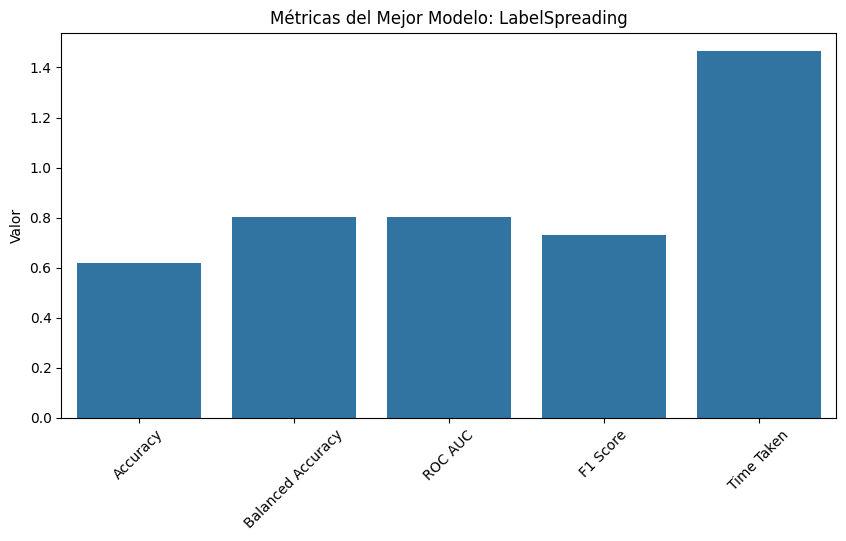

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Convertir las métricas a formato de diccionario
metrics_dict = best_model_metrics.to_dict()

# Graficar
plt.figure(figsize=(10, 5))
sns.barplot(x=list(metrics_dict.keys()), y=list(metrics_dict.values()))
plt.xticks(rotation=45)
plt.title(f'Métricas del Mejor Modelo: {best_model_name}')
plt.ylabel("Valor")
plt.show()

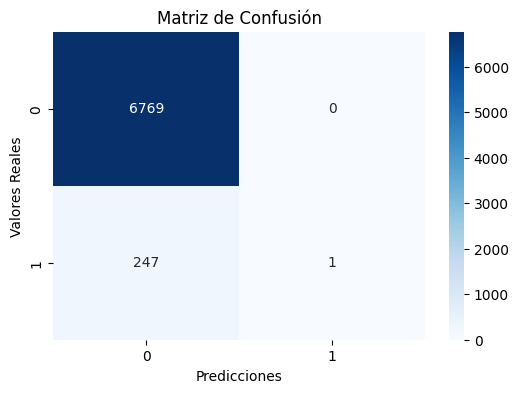

              precision    recall  f1-score   support

           0       0.96      1.00      0.98      6769
           1       1.00      0.00      0.01       248

    accuracy                           0.96      7017
   macro avg       0.98      0.50      0.50      7017
weighted avg       0.97      0.96      0.95      7017



In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

# Importar el modelo seleccionado
from sklearn.ensemble import RandomForestClassifier  # Cambia esto según el mejor modelo

best_model = RandomForestClassifier()  # Instancia del modelo
best_model.fit(X_train, y_train)  # Entrenamiento

# Predicciones en test
y_pred = best_model.predict(X_test)

# Matriz de confusión
cm = confusion_matrix(y_test, y_pred)

# Visualizar matriz de confusión
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues")
plt.xlabel("Predicciones")
plt.ylabel("Valores Reales")
plt.title("Matriz de Confusión")
plt.show()

# Reporte de clasificación
print(classification_report(y_test, y_pred))

RandomForestClassifier

In [ ]:
! pip install flaml

In [ ]:
from flaml import AutoML
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# Separating the target variable and rest of the data.
# y = data['Species']
# data.drop('Species',inplace=True,axis=1)
# X = data

#Using Label Encoder to convert categorical variables to numerical variables
label_endcoder = LabelEncoder()
y = label_endcoder.fit_transform(y)

# Splitting the dataset into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=.3,random_state =1)

automl = AutoML()

#Training the models
automl.fit(X_train, y_train, task="classification")

[flaml.automl.logger: 03-13 17:36:46] {1728} INFO - task = classification
[flaml.automl.logger: 03-13 17:36:46] {1739} INFO - Evaluation method: cv
[flaml.automl.logger: 03-13 17:36:46] {1838} INFO - Minimizing error metric: 1-roc_auc
[flaml.automl.logger: 03-13 17:36:46] {1861} WARNING - No search budget is provided via time_budget or max_iter. Training only one model per estimator. Zero-shot AutoML is used for certain tasks and estimators. To tune hyperparameters for each estimator, please provide budget either via time_budget or max_iter.


INFO:flaml.default.suggest:metafeature distance: 0.4061454088294448
INFO:flaml.default.suggest:metafeature distance: 0.4061454088294448
INFO:flaml.default.suggest:metafeature distance: 0.4061454088294448
INFO:flaml.default.suggest:metafeature distance: 0.4061454088294448
INFO:flaml.default.suggest:metafeature distance: 0.4084163343929009
INFO:flaml.default.suggest:metafeature distance: 0.4061454088294448


[flaml.automl.logger: 03-13 17:36:46] {1955} INFO - List of ML learners in AutoML Run: ['xgboost', 'lgbm', 'rf', 'extra_tree', 'xgb_limitdepth', 'sgd', 'lrl1']
[flaml.automl.logger: 03-13 17:36:46] {2258} INFO - iteration 0, current learner xgboost
[flaml.automl.logger: 03-13 17:37:24] {2393} INFO - Estimated sufficient time budget=10000s. Estimated necessary time budget=10s.
[flaml.automl.logger: 03-13 17:37:24] {2442} INFO -  at 38.7s,	estimator xgboost's best error=0.2635,	best estimator xgboost's best error=0.2635
[flaml.automl.logger: 03-13 17:37:24] {2258} INFO - iteration 1, current learner lgbm
[flaml.automl.logger: 03-13 17:38:14] {2442} INFO -  at 88.5s,	estimator lgbm's best error=0.2367,	best estimator lgbm's best error=0.2367
[flaml.automl.logger: 03-13 17:38:14] {2258} INFO - iteration 2, current learner rf
[flaml.automl.logger: 03-13 17:38:51] {2442} INFO -  at 125.5s,	estimator rf's best error=0.2924,	best estimator lgbm's best error=0.2367
[flaml.automl.logger: 03-13 1

INFO:flaml.tune.searcher.blendsearch:No low-cost partial config given to the search algorithm. For cost-frugal search, consider providing low-cost values for cost-related hps via 'low_cost_partial_config'. More info can be found at https://microsoft.github.io/FLAML/docs/FAQ#about-low_cost_partial_config-in-tune


[flaml.automl.logger: 03-13 17:40:23] {2442} INFO -  at 217.3s,	estimator sgd's best error=0.4933,	best estimator lgbm's best error=0.2367
[flaml.automl.logger: 03-13 17:40:23] {2258} INFO - iteration 6, current learner lrl1


INFO:flaml.tune.searcher.blendsearch:No low-cost partial config given to the search algorithm. For cost-frugal search, consider providing low-cost values for cost-related hps via 'low_cost_partial_config'. More info can be found at https://microsoft.github.io/FLAML/docs/FAQ#about-low_cost_partial_config-in-tune


[flaml.automl.logger: 03-13 17:40:25] {2442} INFO -  at 219.5s,	estimator lrl1's best error=0.3805,	best estimator lgbm's best error=0.2367
[flaml.automl.logger: 03-13 17:40:35] {2685} INFO - retrain lgbm for 10.0s
[flaml.automl.logger: 03-13 17:40:35] {2688} INFO - retrained model: LGBMClassifier(colsample_bytree=0.5157078343718623,
               learning_rate=0.0016660662914022304, max_bin=255,
               min_child_samples=29, n_estimators=2541, n_jobs=-1,
               num_leaves=1667, reg_alpha=0.045792841240713165,
               reg_lambda=0.0012362651138125363, verbose=-1)
[flaml.automl.logger: 03-13 17:40:35] {1985} INFO - fit succeeded
[flaml.automl.logger: 03-13 17:40:35] {1986} INFO - Time taken to find the best model: 88.5156741142273


In [ ]:
automl.best_estimator

'lgbm'

In [ ]:
automl.best_config

{'n_estimators': 2541,
 'num_leaves': 1667,
 'min_child_samples': 29,
 'learning_rate': 0.0016660662914022304,
 'log_max_bin': 8,
 'colsample_bytree': 0.5157078343718623,
 'reg_alpha': 0.045792841240713165,
 'reg_lambda': 0.0012362651138125363}

Reporte de clasificación:
               precision    recall  f1-score   support

           0       0.97      1.00      0.98     10147
           1       0.79      0.06      0.11       378

    accuracy                           0.97     10525
   macro avg       0.88      0.53      0.55     10525
weighted avg       0.96      0.97      0.95     10525



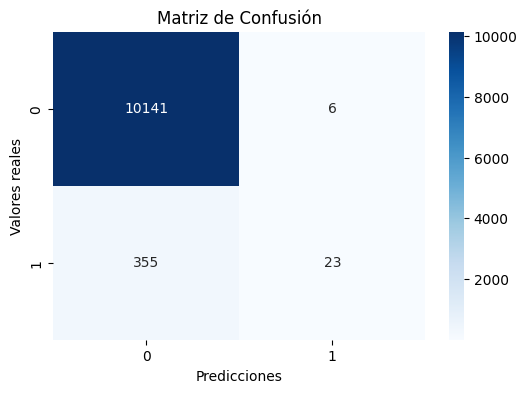

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Predicciones en el conjunto de prueba
y_pred = automl.predict(X_test)

# Reporte de clasificación
print("Reporte de clasificación:\n", classification_report(y_test, y_pred))

# Matriz de confusión
cm = confusion_matrix(y_test, y_pred)

# Visualizar matriz de confusión
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues", xticklabels=label_endcoder.classes_, yticklabels=label_endcoder.classes_)
plt.xlabel("Predicciones")
plt.ylabel("Valores reales")
plt.title("Matriz de Confusión")
plt.show()

lgbm

# prueba 4

In [ ]:
%pip install h2o
%pip install rdt

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.5/68.5 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 16.3 MB/s eta 0:00:00


In [ ]:
import h2o
import pandas as pd
import numpy as np
from h2o.estimators import H2ORandomForestEstimator
from sklearn.model_selection import train_test_split
from rdt import HyperTransformer
# Iniciar H2O
h2o.init()
# 3️⃣ Eliminar filas con valores nulos
df2 = df2.drop(columns=['JORNADA']).dropna()

# 4️⃣ Separar variable objetivo
target_column = "DISCAPACIDAD_BINARIA"
X = df2.drop(columns=[target_column])
y = df2[target_column]

# 5️⃣ Crear el transformador RDT 🚀
ht = HyperTransformer()

# 6️⃣ Detectar configuración automáticamente ✅
ht.detect_initial_config(X)

# 7️⃣ Ajustar y transformar los datos 🔄
ht.fit(X)
X_transformed = ht.transform(X)

# 8️⃣ Convertir a DataFrame para visualizar 🔍
X_transformed = pd.DataFrame(X_transformed, columns=X.columns)

# 9️⃣ Mostrar comparación antes y después de la transformación
print("🔹 Datos originales:")
print(X.head())

print("\n🔹 Datos transformados:")
print(X_transformed.head())

# 🔟 Separar en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, test_size=0.3, random_state=42)


Checking whether there is an H2O instance running at http://localhost:54321. connected.
Please download and install the latest version from: https://h2o-release.s3.amazonaws.com/h2o/latest_stable.html


H2O_cluster_uptime:,51 mins 25 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.6
H2O_cluster_version_age:,4 months and 12 days
H2O_cluster_name:,H2O_from_python_unknownUser_n1pb0i
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,2.724 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


🔹 Datos originales:
                                              SEDE ZONA_SEDE  GRADO_COD  \
0            INSTITUCIÓN EDUCATIVA SIETE DE AGOSTO    URBANA          8   
1            INSTITUCIÓN EDUCATIVA SIETE DE AGOSTO    URBANA          4   
2          INSTITUCIÓN EDUCATIVA COLEGIO SAN JORGE    URBANA          2   
3  INSTITUCIÓN EDUCATIVA INEM BALDOMERO SANIN CANO    URBANA          7   
4            INSTITUCIÓN EDUCATIVA SIETE DE AGOSTO    URBANA          6   

     ESTRATO  SISBEN IV     GENERO PAIS_ORIGEN  EDAD  
0  ESTRATO 1  NO APLICA  MASCULINO    COLOMBIA    14  
1  ESTRATO 1         A1  MASCULINO    COLOMBIA    10  
2  ESTRATO 3         A3  MASCULINO    COLOMBIA     7  
3  ESTRATO 1         A3   FEMENINO    COLOMBIA    15  
4  ESTRATO 2  NO APLICA  MASCULINO    COLOMBIA    12  

🔹 Datos transformados:
       SEDE  ZONA_SEDE  GRADO_COD   ESTRATO  SISBEN IV    GENERO  PAIS_ORIGEN  \
0  0.009942   0.250078        8.0  0.262427   0.573237  0.391869     0.598864   
1  0.006063  

In [ ]:
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTEENN
# Aplicar SMOTE para balancear las clases antes de convertir a H2OFrame
smote = SMOTE(sampling_strategy=0.4, random_state=42, k_neighbors=3)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)


# smote_enn = SMOTEENN(sampling_strategy=0.4, random_state=42)
# X_resampled, y_resampled = smote_enn.fit_resample(X_train, y_train)

# Convertir nuevamente a DataFrame
X_resampled = pd.DataFrame(X_resampled, columns=X_train.columns)
y_resampled = pd.Series(y_resampled, name=target_column)



In [ ]:
# Convertir datos balanceados a H2OFrame
train_h2o = h2o.H2OFrame(pd.concat([X_resampled, y_resampled], axis=1))
test_h2o = h2o.H2OFrame(pd.concat([X_test, y_test], axis=1))

# Convertir la columna objetivo a factor
train_h2o[target_column] = train_h2o[target_column].asfactor()
test_h2o[target_column] = test_h2o[target_column].asfactor()


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [ ]:
model = H2ORandomForestEstimator(
    ntrees=500,              # Reducir número de árboles para evitar sobreajuste
    max_depth=20,            # Limitar profundidad
    min_rows=5,              # Evitar que nodos pequeños dominen la clase mayoritaria
    balance_classes=True,     # Equilibrar clases en el entrenamiento
    sample_rate=0.8,         # Usar 80% de los datos en cada árbol (reduce varianza)
    col_sample_rate_per_tree=0.8,  # Usar 80% de las columnas en cada árbol
    binomial_double_trees=True,  # Activar para mejorar clasificación binaria
    seed=42                 # Para reproducibilidad
)
features = X_transformed.columns.tolist()  #
# Entrenar modelo
model.train(x=features, y=target_column, training_frame=train_h2o, validation_frame=test_h2o)



drf Model Build progress: |██████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2ORandomForestEstimator : Distributed Random Forest
Model Key: DRF_model_python_1741976058984_61


Model Summary: 
    number_of_trees    number_of_internal_trees    model_size_in_bytes    min_depth    max_depth    mean_depth    min_leaves    max_leaves    mean_leaves
--  -----------------  --------------------------  ---------------------  -----------  -----------  ------------  ------------  ------------  -------------
    500                1000                        2.98446e+07            20           20           20            1365          2934          2373.88

ModelMetricsBinomial: drf
** Reported on train data. **

MSE: 0.09995909670276029
RMSE: 0.31616308561051254
LogLoss: 0.3359398156525052
Mean Per-Class Error: 0.0372398389702784
AUC: 0.994007399527955
AUCPR: 0.993613813771504
Gini: 0.98801479905591

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.3290626054151855
       0      1      Error    Rate
-----  -----  -----  -------  ----------------
0      22390  1182   0.0501   (1182.0/23572.0)
1      574    23013  0.0243   (574.0/23587.0)
Total  22964  24195  0.0372   (1756.0/47159.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.329063     0.96325   237
max f2                       0.285122     0.975173  252
max f0point5                 0.400963     0.967456  211
max accuracy                 0.337603     0.96287   234
max precision                0.960468     1         0
max recall                   0.124012     1         320
max specificity              0.960468     1         0
max absolute_mcc             0.337603     0.925879  234
max min_per_class_accuracy   0.354115     0.961607  228
max mean_per_class_accuracy  0.337603     0.962868  234
max tns                      0.960468     23572     0
max fns                      0.960468     23584     0
max fps                      0.00174109   23572     399
max tps                      0.124012     23587     320
max tnr                      0.960468     1         0
max fnr                      0.960468     0.999873  0
max fpr                      0.00174109   1         399
max tpr                      0.124012     1         320

Gains/Lift Table: Avg response rate: 50.02 %, avg score: 36.39 %
group    cumulative_data_fraction    lower_threshold    lift       cumulative_lift    response_rate    score      cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain      cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  ---------  -----------------  ---------------  ---------  --------------------------  ------------------  --------------  -------------------------  --------  -----------------  --------------------
1        0.0100087                   0.846042           1.99936    1.99936            1                0.877036   1                           0.877036            0.020011        0.020011                   99.9364   99.9364            0.020011
2        0.0200174                   0.819378           1.99936    1.99936            1                0.831728   1                           0.854382            0.020011        0.040022                   99.9364   99.9364            0.040022
3        0.0300049                   0.798801           1.99512    1.99795            0.997877         0.808306   0.999293                    0.839045            0.0199262       0.0599483                  99.5119   99.7951            0.0599059
4        0.0400136                   0.78402            1.99936    1.9983             1                0.791192   0.99947                     0.827075            0.020011        0.0799593                  99.9364   99.8305            0.0799169
5        0.0500011                   0.77074            1.99936    1.99852            1                0.77727    0.999576       

In [ ]:
import numpy as np
from sklearn.metrics import classification_report

# Obtener probabilidades de predicción
y_probs = model.predict(test_h2o)["p1"].as_data_frame().values

# Probar diferentes umbrales
thresholds = np.linspace(0.1, 0.9, 10)
for t in thresholds:
    y_pred = (y_probs > t).astype(int)
    print(f"\nThreshold: {t}")
    print(classification_report(y_test, y_pred, target_names=["Clase 0", "Clase 1"]))


drf prediction progress: |███████████████████████████████████████████████████████| (done) 100%

Threshold: 0.1
              precision    recall  f1-score   support

     Clase 0       0.98      0.51      0.67     10140
     Clase 1       0.05      0.73      0.10       385

    accuracy                           0.52     10525
   macro avg       0.52      0.62      0.39     10525
weighted avg       0.95      0.52      0.65     10525


Threshold: 0.18888888888888888
              precision    recall  f1-score   support

     Clase 0       0.97      0.79      0.87     10140
     Clase 1       0.07      0.42      0.12       385

    accuracy                           0.78     10525
   macro avg       0.52      0.61      0.50     10525
weighted avg       0.94      0.78      0.85     10525


Threshold: 0.2777777777777778
              precision    recall  f1-score   support

     Clase 0       0.97      0.91      0.94     10140
     Clase 1       0.09      0.23      0.13       385

    accu

/usr/local/lib/python3.11/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install polars and pyarrow and use it as pandas_df = h2o_df.as_data_frame(use_multi_thread=True)

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capit

              precision    recall  f1-score   support

     Clase 0       0.96      1.00      0.98     10140
     Clase 1       1.00      0.00      0.01       385

    accuracy                           0.96     10525
   macro avg       0.98      0.50      0.49     10525
weighted avg       0.96      0.96      0.95     10525


Threshold: 0.7222222222222222
              precision    recall  f1-score   support

     Clase 0       0.96      1.00      0.98     10140
     Clase 1       0.00      0.00      0.00       385

    accuracy                           0.96     10525
   macro avg       0.48      0.50      0.49     10525
weighted avg       0.93      0.96      0.95     10525


Threshold: 0.8111111111111111
              precision    recall  f1-score   support

     Clase 0       0.96      1.00      0.98     10140
     Clase 1       0.00      0.00      0.00       385

    accuracy                           0.96     10525
   macro avg       0.48      0.50      0.49     10525
weighted avg

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


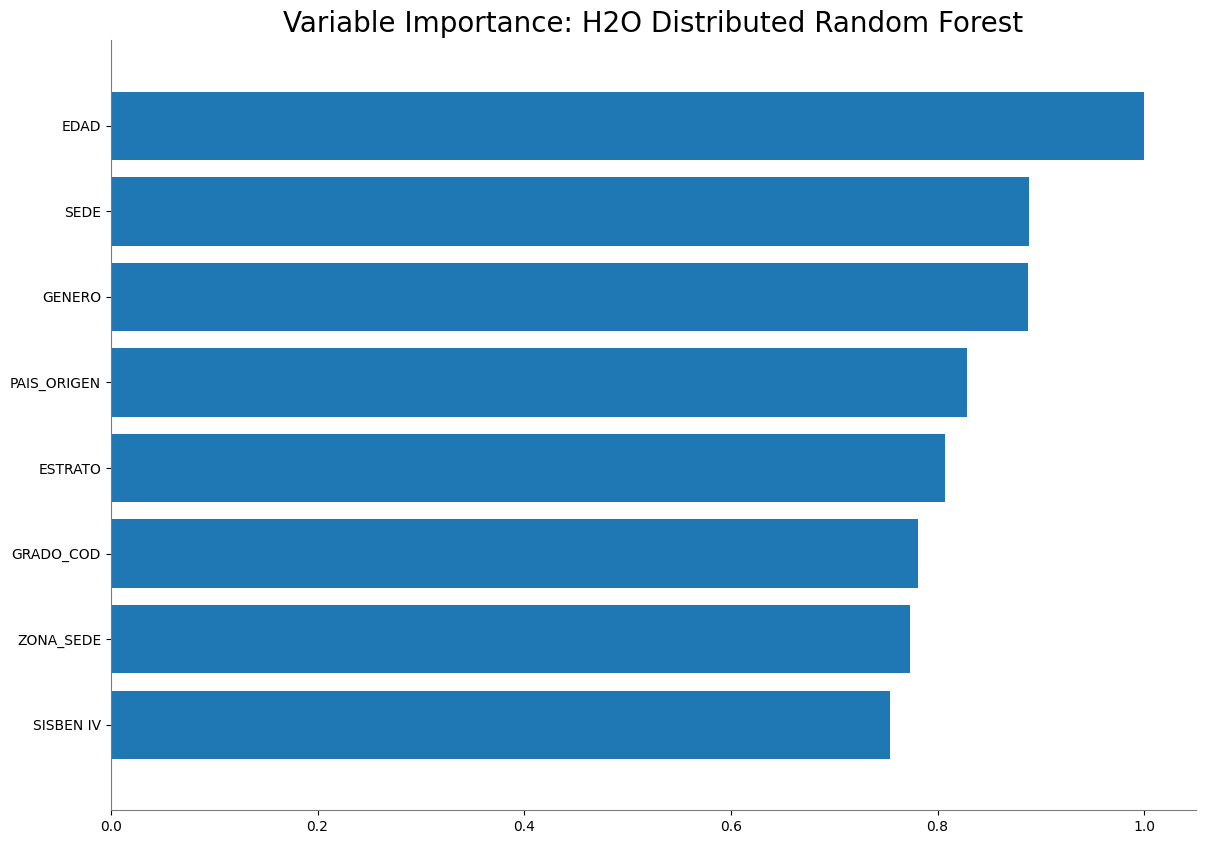

<Figure size 640x480 with 0 Axes>

In [ ]:
model.varimp_plot()


In [ ]:
perf = model.model_performance(test_data=test_h2o)
print(perf)


ModelMetricsBinomial: drf
** Reported on test data. **

MSE: 0.04835916451356184
RMSE: 0.21990717249230832
LogLoss: 0.20226175919863706
Mean Per-Class Error: 0.42738223315146395
AUC: 0.6880709034555188
AUCPR: 0.09170056413158503
Gini: 0.3761418069110376

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.3005421860820153
       0     1    Error    Rate
-----  ----  ---  -------  ---------------
0      9453  687  0.0678   (687.0/10140.0)
1      303   82   0.787    (303.0/385.0)
Total  9756  769  0.0941   (990.0/10525.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.300542     0.142114  100
max f2                       0.134892     0.224878  234
max f0point5                 0.397639     0.128205  54
max accuracy                 0.601329     0.9638    3
max precision                0.671966     1         0
max recall       

In [ ]:
auc = perf.auc()
print(f"AUC: {auc}")


AUC: 0.6880709034555188


In [ ]:
print("Matriz de Confusión:")
print(perf.confusion_matrix())


Matriz de Confusión:
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.3005421860820153
       0     1    Error    Rate
-----  ----  ---  -------  ---------------
0      9453  687  0.0678   (687.0/10140.0)
1      303   82   0.787    (303.0/385.0)
Total  9756  769  0.0941   (990.0/10525.0)


In [ ]:
accuracy = perf.accuracy()
print(f"Exactitud (Accuracy): {accuracy}")


Exactitud (Accuracy): [[0.6013294484596903, 0.9638004750593824]]


In [ ]:
print("Precisión y Sensibilidad:")
print(perf.precision())
print(perf.recall())

Precisión y Sensibilidad:
[[0.6719660131063807, 1.0]]
[[0.017083109400086564, 1.0]]


In [ ]:
print("Importancia de características:")
print(model.varimp(use_pandas=True))


Importancia de características:
      variable  relative_importance  scaled_importance  percentage
0         EDAD           902004.875           1.000000    0.148794
1         SEDE           801208.750           0.888253    0.132166
2       GENERO           800691.875           0.887680    0.132081
3  PAIS_ORIGEN           747426.500           0.828628    0.123295
4      ESTRATO           728121.750           0.807226    0.120110
5    GRADO_COD           704663.250           0.781219    0.116240
6    ZONA_SEDE           697818.375           0.773630    0.115111
7    SISBEN IV           680182.250           0.754078    0.112202
